In [ ]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.3.5
1.21.6


In [ ]:
df=pd.read_csv("/content/rspuramhousing.csv")
df

,area,bedroom,age,price
0,2200,3.0,15,8400000
1,2500,2.0,20,1300000
2,3000,4.0,14,1500000
3,3400,NaN,13,1800000
4,3600,3.0,10,1900000
5,4000,5.0,8,2200000


Handling missing values

In [ ]:
import math

In [ ]:
bedroommedian=math.floor(df.bedroom.median())
bedroommedian

3

In [ ]:
df.bedroom.median()

3.0

In [ ]:
df["bedroom"]=df.bedroom.fillna(bedroommedian)
df

,area,bedroom,age,price
0,2200,3.0,15,8400000
1,2500,2.0,20,1300000
2,3000,4.0,14,1500000
3,3400,3.0,13,1800000
4,3600,3.0,10,1900000
5,4000,5.0,8,2200000


MACHINE LEARNING PROCESS

In [ ]:
from sklearn import linear_model

In [ ]:
reg=linear_model.LinearRegression()

Creating X.y variables

In [ ]:
X=df.drop("price",axis=1)
X

,area,bedroom,age
0,2200,3.0,15
1,2500,2.0,20
2,3000,4.0,14
3,3400,3.0,13
4,3600,3.0,10
5,4000,5.0,8


In [ ]:
y=df['price']
y

0    8400000
1    1300000
2    1500000
3    1800000
4    1900000
5    2200000
Name: price, dtype: int64

In [ ]:
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.predict([[2200,2,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21910659.99668344])

In [ ]:
reg.predict([[3500,3,9]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4442717.37327954])

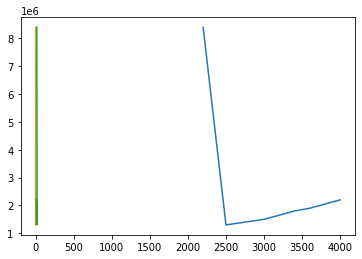

In [ ]:
from matplotlib import pyplot as plt
plt.plot(X,y)

Create a client file with area,bedroom,age atleast 10 to 15 data

In [ ]:
clientdf=pd.read_csv("/content/areabedage.csv")
clientdf

,area,bedrroom,age
0,1000,2,5
1,2000,3,7
2,2500,4,8
3,3000,5,9
4,3400,4,8
5,3700,6,10
6,3900,7,11
7,4000,8,12
8,4500,9,15


In [ ]:
resultdf=reg.predict(clientdf)
resultdf

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- bedrroom
Feature names seen at fit time, yet now missing:
- bedroom

  warnings.warn(message, FutureWarning)


array([ 26596802.27737549,  17202211.0441656 ,  12389442.26410922,
         7576673.48405285,   5916914.4878669 ,   1325565.19816484,
        -1329694.32314409,  -3265784.09153722, -10050500.24874246])

In [ ]:
clientdf

,area,bedrroom,age
0,1000,2,5
1,2000,3,7
2,2500,4,8
3,3000,5,9
4,3400,4,8
5,3700,6,10
6,3900,7,11
7,4000,8,12
8,4500,9,15


In [ ]:
clientdf['price']=resultdf
clientdf

,area,bedrroom,age,price
0,1000,2,5,2.659680e+07
1,2000,3,7,1.720221e+07
2,2500,4,8,1.238944e+07
3,3000,5,9,7.576673e+06
4,3400,4,8,5.916914e+06
5,3700,6,10,1.325565e+06
6,3900,7,11,-1.329694e+06
7,4000,8,12,-3.265784e+06
8,4500,9,15,-1.005050e+07


In [ ]:
clientdf.to_csv("clientoutputfile.csv",index=False)

#Understanding the ML

In [21]:
#y=mX+b
in1=2500
m=reg.coef_
b=reg.intercept_

In [22]:
y=m*in1+b
y

array([ 2.12010171e+07, -5.38185556e+08, -2.42575396e+09])

#Downloading the model using pickle

In [24]:
#importing the pickle library
import pickle

In [25]:
#create a file object by creating a new file that can write a binary data and that can be stored to a pickle

#to open a new file

with open('rspuramhousingmodel','wb') as f:
  pickle.dump(reg,f)